# Kolmogorov-Smirnov test: sample vs. PDF

### This notebook is licensed  under [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1) © 2024 by Xavier Luri (ICCUB)

Given a sample:

* $(x_1, \ldots, x_N)$

we want to ascertain if it is compatible with a given pdf $f(x)$. Let:

* $ecfd(x)$ the experimental CDF of the sample
* $cdf(x)$ the CDF of $f(x)$

We define:

__D = max|cdf(x) - ecdf(x)|__

![](D_KS.png)

Let the null hypothesis $H_0$ be __the sample has been drawn from f(x)__. If $H_0$ is true then $D$ can be used to build the Kolmogorov-Smirnov test, see:

https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test

The significance in this case is given by

$P(x>D) = Q_{KS}\left( D \left[ \sqrt{N} + 0.12 + \frac{0.11}{\sqrt{N}} \right] \right)$

where 

$Q_{KS}= 2 \sum_{j=1}^{\infty} (-1)^{j-1} e^{-2 j^2 \lambda^2} $

__Note:__ 

## Example: KS as a test of normality

__Note:__ KS has the advantage of being very general, applicable to any distibution, but when comparing with other specific tests (e.g. Shapiro-Wilks in this case) it is usually less powerful (less sensitive to deviations from $H_0$), requiring more values in the sample to reach the same efficiency.

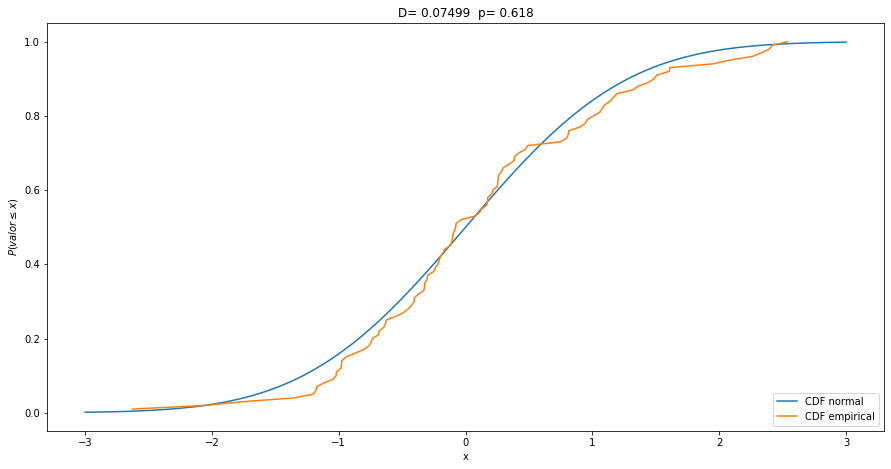

In [2]:
%matplotlib inline
import scipy.stats as scp
import matplotlib.pylab as plt
import numpy as np
import statsmodels.distributions.empirical_distribution as stm

# Parameters of the normal distributions to use
# and number of points per sample
mu=0
sig=1
N=100

dist= scp.norm(mu,sig)

# ----------------------------------------
# Plot the CDF of the normal distribution
# ----------------------------------------
x = np.linspace(mu-3*sig,mu+3*sig, N)

fig = plt.figure(frameon=False)
fig.set_size_inches(15,7.5)
plt.plot(x, dist.cdf(x), label= 'CDF normal')
plt.ylabel('$P(valor \leq x)$')
plt.xlabel('x')

# ---------------------------------------------
# Generate a normal sample and plot the CDF   
# ---------------------------------------------
x = dist.rvs(N)
ecdf = stm.ECDF(x)
plt.plot(ecdf.x,ecdf.y,label = 'CDF empirical')

#----------
# KS test
#----------
D_value,p_value= scp.kstest(x,dist.cdf)
plt.title("D= {:.5f}  p= {:.3f}".format(D_value,p_value))

plt.legend(loc=4)
plt.show()

# Kolmogorov-Smirnov test: sample vs. sample

Given two samples:

* $(x_1, \ldots, x_N)$

* $(y_1, \ldots, y_M)$

we want to ascertain if they are compatible, if they can come from the sampe PDF $f(x)$. In a similar way than in the previous case, let:

* $ecfd1(x)$ the experimental CDF of the first sample
* $ecfd2(x)$ the experimental CDF of the second sample

We define:

__D = max|ecdf1(x) - ecdf2(x)|__

![](D_KS_2samples.png)

Let the null hypothesis $H_0$ be __the samples have been drawn from the same PDF f(x)__. If $H_0$ is true then $D$ can be used to build the Kolmogorov-Smirnov two-sample test, see:

https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test

__Note from wikipedia:__ the two-sample K–S test is one of the most useful and general nonparametric methods for comparing two samples, as it is sensitive to differences in both location and shape of the empirical cumulative distribution functions of the two samples. 

## Comparing two samples

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy.stats.ks_2samp

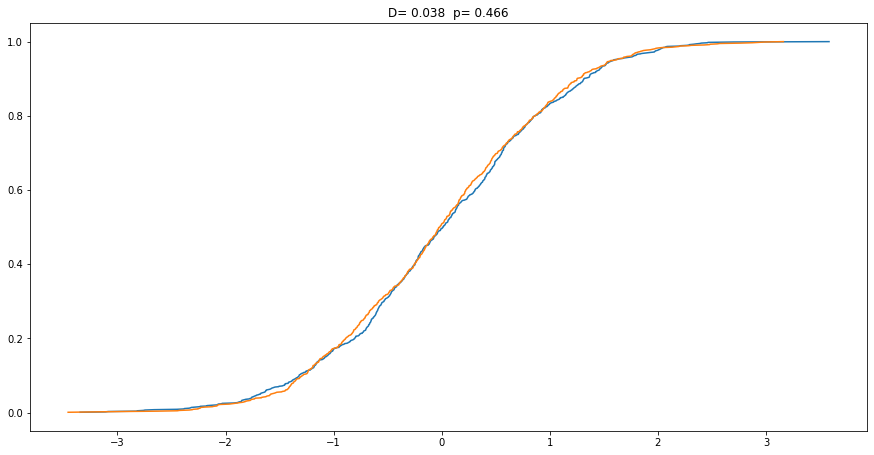

In [8]:
%matplotlib inline
import scipy.stats as scp
import matplotlib.pylab as plt
import statsmodels.distributions.empirical_distribution as stm

# Parameters of the normal distributions to use
# and number of points per sample
mu1=0
mu2=0
sig1=1
sig2=1

N= 1000
M= 1000

# Generate pairs of normal samples 
x = scp.norm.rvs(mu1, sig1, N)
y = scp.norm.rvs(mu2, sig2, M)    
    
# Plot eCDFs 
fig = plt.figure(frameon=False)
fig.set_size_inches(15,7.5)
ecdf = stm.ECDF(x)
plt.plot(ecdf.x,ecdf.y,label = 'CDF sample 1')
ecdf = stm.ECDF(y)
plt.plot(ecdf.x,ecdf.y,label = 'CDF sample 21')

# Run KS test for two samples
D_value,p_value= scp.ks_2samp(x,y)
plt.title("D= {:.3f}  p= {:.3f}".format(D_value,p_value))

p= plt.show